In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

In [10]:
end = dt.datetime.today()
start = end - dt.timedelta(days = (35 * 365)) 

df = yf.download("^GSPC", start, end)['Adj Close'].to_frame().pct_change().dropna()
df.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
1986-07-01,0.004784
1986-07-02,0.002619
1986-07-03,-0.003601
1986-07-07,-0.030740
1986-07-08,-0.010080


In [23]:
import numpy as np

#resample to get monthly volatility
mnthly_annu = df.resample("M").std() * np.sqrt(12)

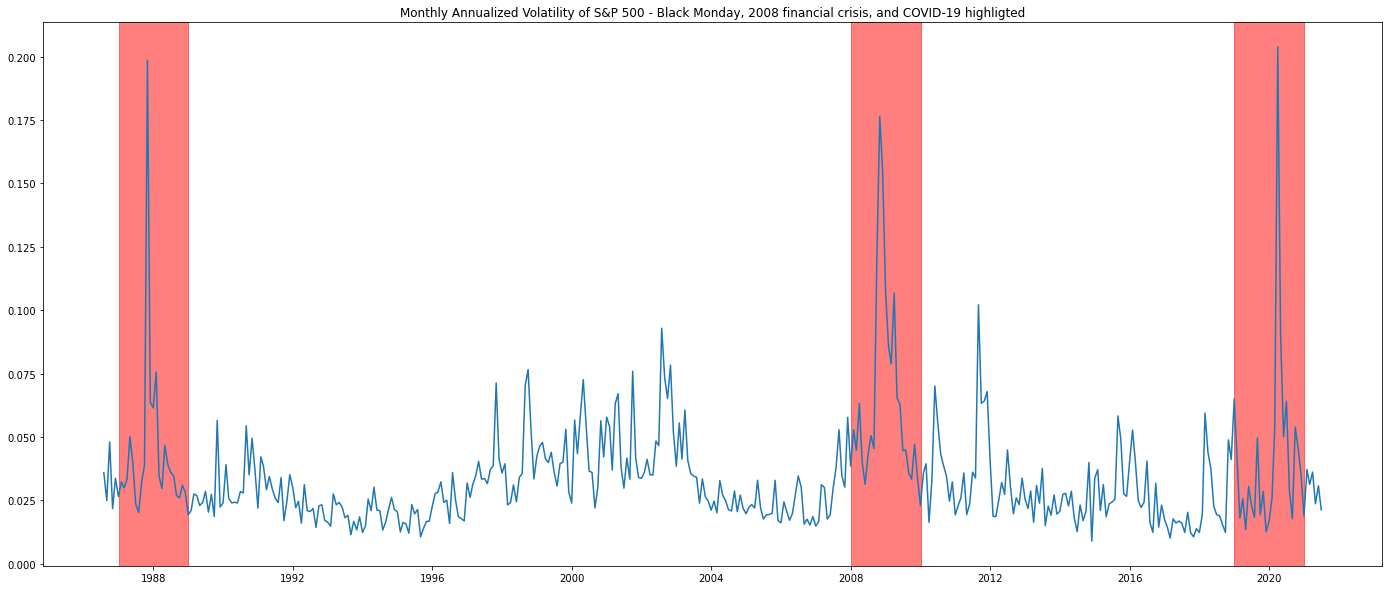

In [24]:
#now we want to plot the monthly input
plt.figure(figsize = (24,10))
plt.title("Monthly Annualized Volatility of S&P 500 - Black Monday, 2008 financial crisis, and COVID-19 highligted")
plt.plot(mnthly_annu)
plt.axvspan('1987', '1989', color = 'r', alpha = 0.5)
plt.axvspan('2008', '2010', color = 'r', alpha = 0.5)
plt.axvspan('2019', '2021', color = 'r', alpha = 0.5)
plt.show()

In [31]:
#not sure what the ranked does but the mnthly_annu.index.year gets the years
ranked = mnthly_annu.groupby(mnthly_annu.index.year).rank()

In [35]:
#then it gest the ranked and sorts by year and gets the mean
final = ranked.groupby(ranked.index.month).mean()

In [36]:
final.describe()

,Adj Close
count,12.000000
mean,6.414286
std,0.686742
min,5.228571
25%,5.985714
50%,6.428571
75%,6.857143
max,7.600000


In [37]:
#really what this dataframe is that the date is the month and the adj close the highest one
final

,Adj Close
Date,
1,6.857143
2,6.857143
3,6.857143
4,7.085714
5,6.742857
6,6.085714
7,5.714286
8,5.771429
9,6.114286


TypeError: only size-1 arrays can be converted to Python scalars

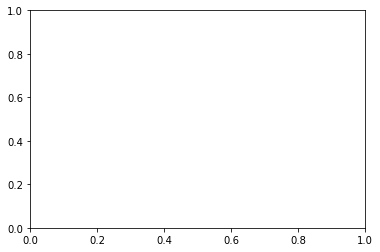

In [38]:
b_plot = plt.bar(x = final.index, height = final)